In [ ]:
import quandl
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fetching historical high prices for AAPL stock data
stock = pd.DataFrame()
quandl.ApiConfig.api_key = "LDs1p4AKWyMoJ2Cra2vJ"
q_data = quandl.get("WIKI/AAPL", rows=1000)
stock.index = q_data.index
stock = pd.concat([stock, q_data.High], axis=1)
stock.columns = ["AAPL"]

In [ ]:
# Fetching historical high prices for BTC data
lim = '2000'
pair = 'BTC'
all_data = 'true'
coins = pd.DataFrame()
crytocompare_api = 'df8f7bb8bab16cebbde44c0af4d27ec3b085443e39293638b4ec33d7a2f44d9e'
url = 'https://min-api.cryptocompare.com/data/histoday?fsym=' + pair + '&tsym=USD&limit=' + lim + '&allData=' + all_data + '&api_key=' + crytocompare_api
data = requests.get(url)
json_data = data.json()
table = pd.json_normalize(json_data, 'Data').set_index('time')
table.index = pd.to_datetime(table.index ,unit='s')
table = table.loc[stock.index]
coins = pd.concat([coins, table.high], axis=1)
coins.columns = [pair]

In [ ]:
# Calculating alpha and beta for BTC and AAPL stock
x = stock.loc[:,"AAPL"]
y = coins.loc[:,pair]
beta = ((np.multiply(y, x)).mean()-np.mean(x)*np.mean(y))/((np.multiply(x, x)).mean()-np.mean(x)*np.mean(x))
alpha =np.mean(y)-beta*np.mean(x)
print("alpha =",alpha, "\nbeta =",beta)

alpha = 1437.0690448701198 
beta = 3.7031770679221294


In [ ]:
# Calculating mean squared error for BTC and AAPL stock
def	 cal_cost(alpha,beta,x,y):
		n = len(y)
		predictions = alpha + np.multiply(beta,x)
		cost = (1/2*n) * np.sum(np.square(predictions-y))
		return cost

In [ ]:
# Initialising variables for gradient descent optimisation
iterations = 1000
alpha = -11
n = len(y)
loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

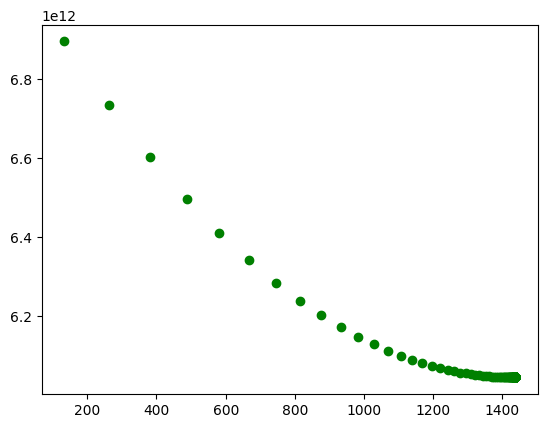

In [ ]:
# Gradient descent optimisation for alpha coefficient estimation
for i in range(iterations):		
		prediction = alpha + np.multiply(beta,x)
		residuals = y-prediction
		residuals_sum = sum(residuals)
		gradient = -(1/n)*0.1*residuals_sum
		alpha = alpha - gradient
		loss_history[i] = cal_cost(alpha,beta,x,y)
		alpha_history[i] = alpha	
plt.plot(alpha_history,loss_history,'go')
plt.show()

Convergence to a loss function minimum can be challenging because there are often local minima that can confuse optimisation algorithms. These algorithms might get stuck in these local minima instead of reaching the global minimum. Furthermore, factors like high dimensionality, noisy data, or non-convex loss surfaces can make convergence difficult.

However, techniques such as adjusting learning rates, utilising regularisation methods, initialising paramaters, or different optimisation algorithms can be adopted to deal with these challenges. Moreover, convergence can also be improved by preprocessing data, reducing dimensionality, or using techniques like early stopping. 


